# Part1. EDA 

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

In [3]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

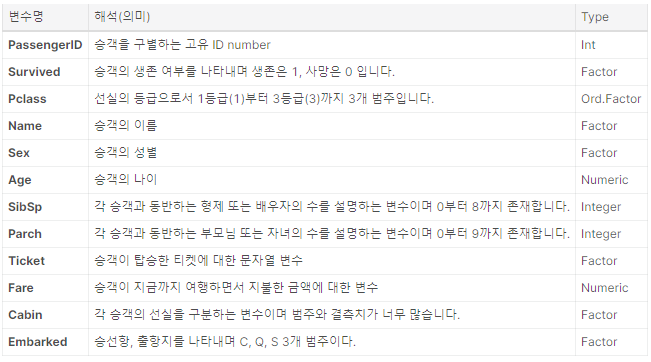

## 얼마나 생존했는지

__<파이차트: pie>__
- __matplotlib 매키지 내 모듈__
- slice: 데이터 (아래의 경우 데이터 미리 지정됨)
- labels: 각 class 이름. 없으면 기존 slice 데이터 이름으로
- explode: 파이 조각이 중심에서 벗어나는 정도. 0일수록 돌출되지 않음
- autopct: 백분율 표시 형식 ('%1.1f%%': 소수점 첫째자리 까지)
- shadow: 그림자 효과 유무

Figure(1296x576)


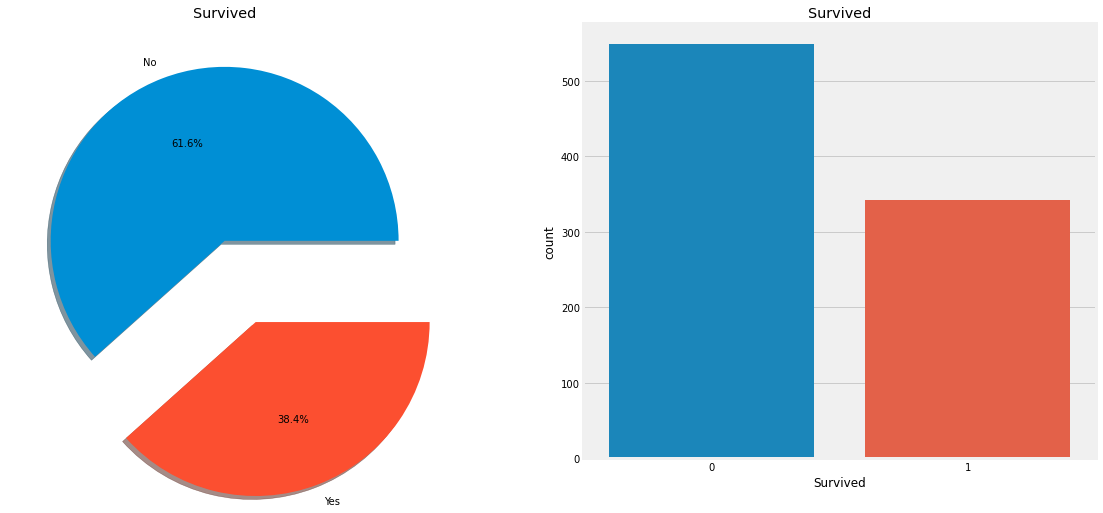

In [5]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
print(f)
print(ax)

data['Survived'].value_counts().plot.pie(labels=['No','Yes'], explode=[0,0.5], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')

plt.show()

## Features의 Type 확인

- Categorical
- Ordinal
- Continous

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Analysing The Features

### Sex: Categorical Feature

In [7]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

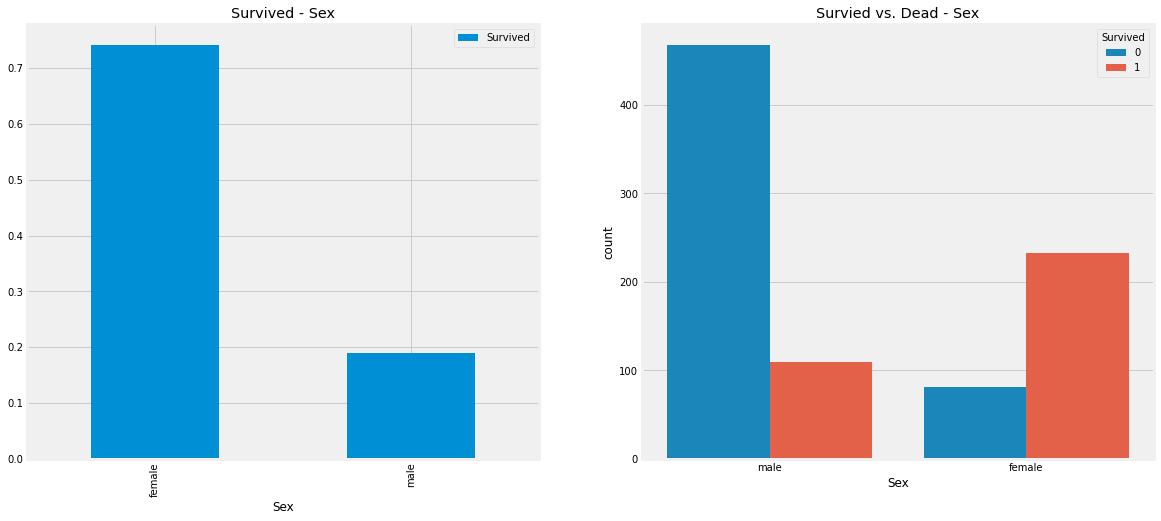

In [8]:
f, ax = plt.subplots(1,2, figsize=(18,8))

data[['Sex', 'Survived']].groupby('Sex').mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived - Sex')

sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Survied vs. Dead - Sex')

plt.show()

M이 F보다 많이 탔지만 생존자 수는 F가 약 2배 높음

### Pclass: Ordinal Feature

In [9]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


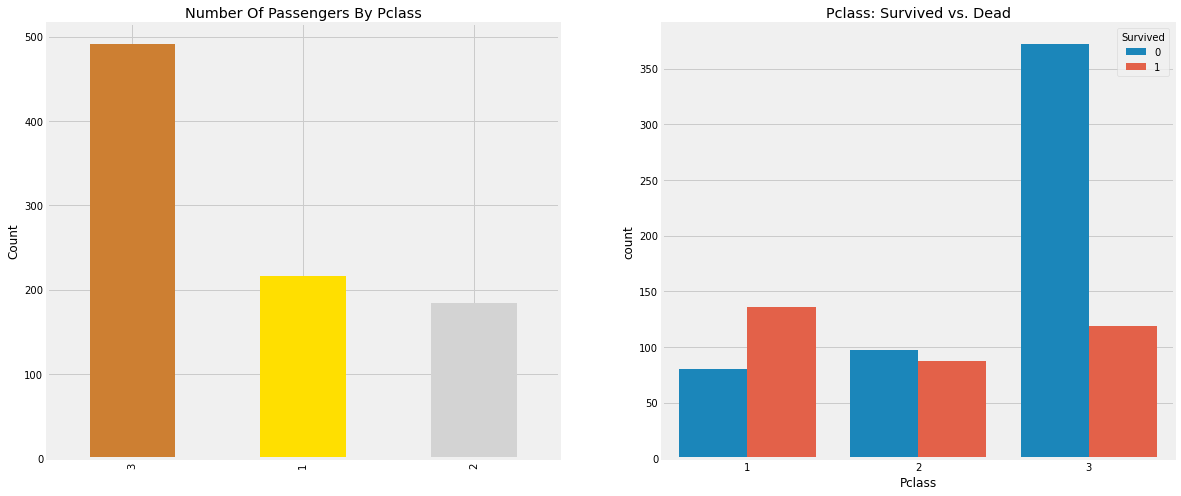

In [10]:
f, ax = plt.subplots(1,2, figsize=(18,8))

data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs. Dead')

plt.show()

더 좋은 class에 있을수록 생존 비율 높음

### Sex & Pclass

In [11]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

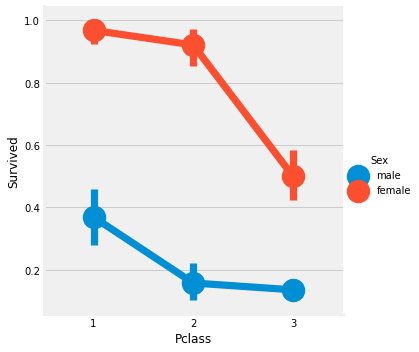

In [12]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

### Age: Continuous Feature

In [13]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


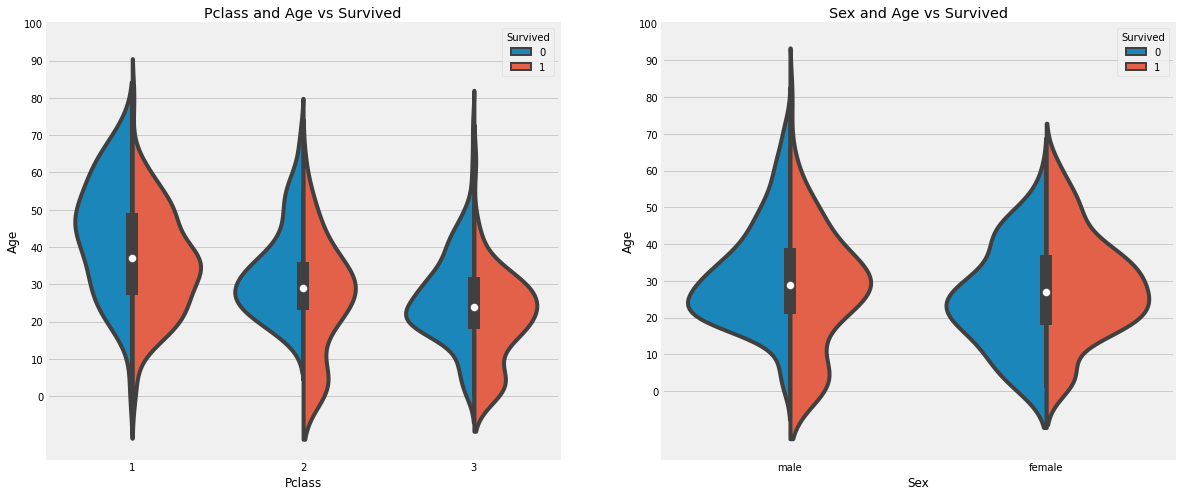

In [14]:
f, ax=plt.subplots(1,2, figsize=(18,8))

sns.violinplot("Pclass", "Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot("Sex", "Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()

#### Age 결측치 처리 - Name으로 성별, 나이 확인 후 이들의 평균으로 결측치 채움

##### Name에서 성별, 나이 정보 확인

In [15]:
data.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [16]:
data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') # .앞에 오는 영문추출

In [17]:
data.Initial.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Don           1
Jonkheer      1
Ms            1
Lady          1
Capt          1
Countess      1
Sir           1
Mme           1
Name: Initial, dtype: int64

In [18]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [19]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],
                        inplace=True)

In [20]:
data.Initial.value_counts()

Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: Initial, dtype: int64

##### 결측치 채움

In [21]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [22]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [23]:
data.Age.isnull().any()

False

#### 결측치 없는 Age EDA

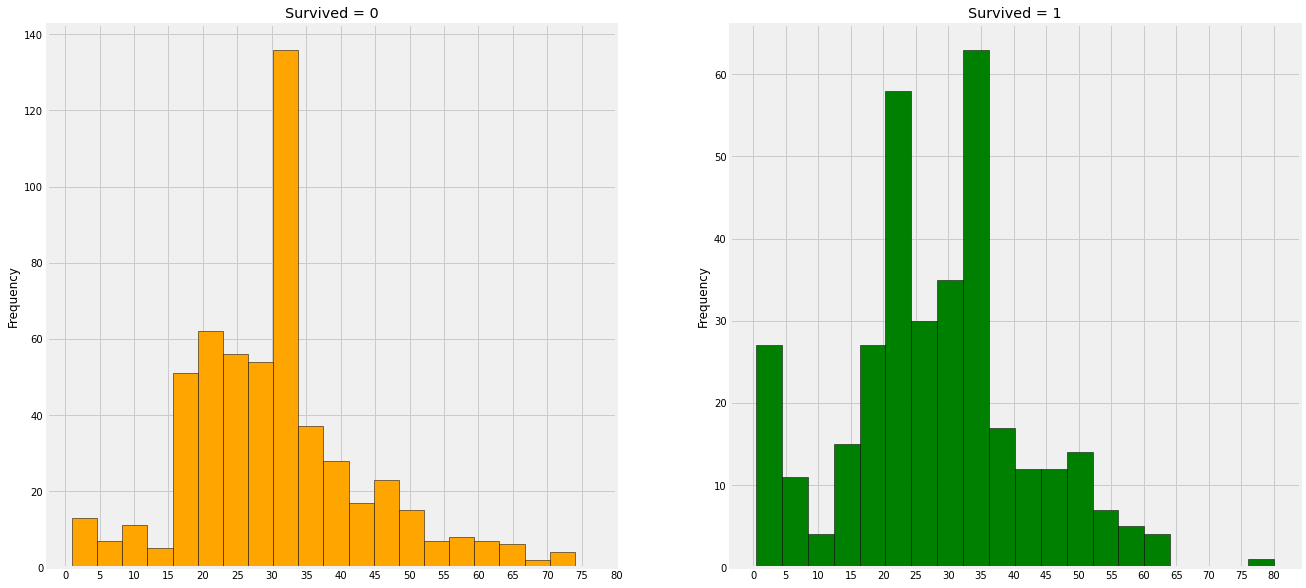

In [24]:
f, ax = plt.subplots(1,2, figsize=(20,10))

data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='orange')
ax[0].set_title('Survived = 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Survived = 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)

plt.show()

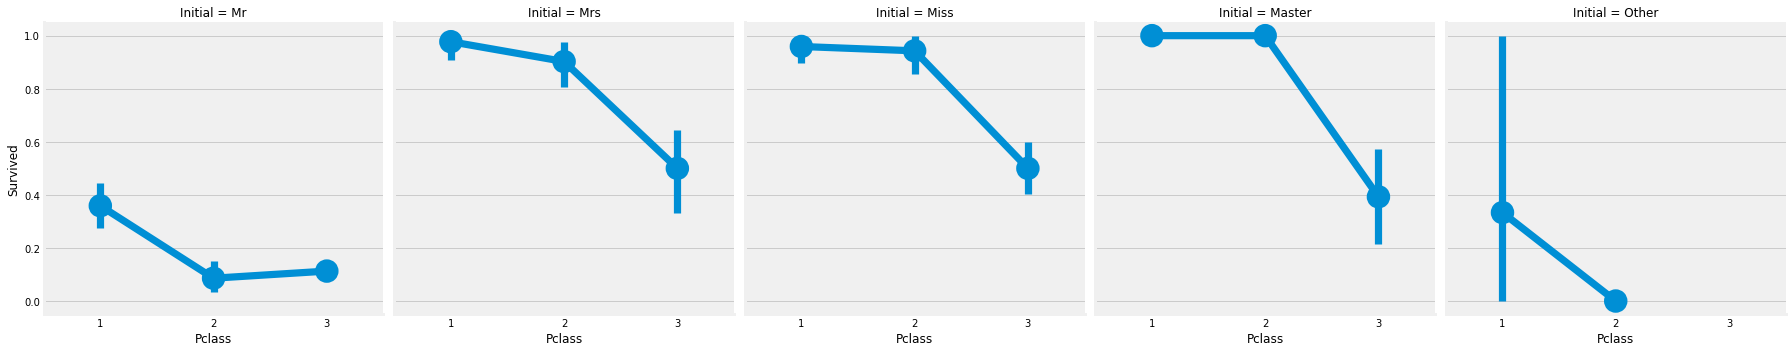

In [25]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

### Embarked: Categorical Feature

In [26]:
pd.crosstab([data.Embarked,data.Pclass], [data.Sex,data.Survived], margins=True).style.background_gradient(cmap='summer_r')

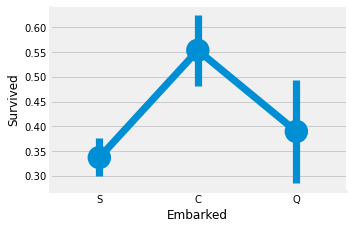

In [27]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

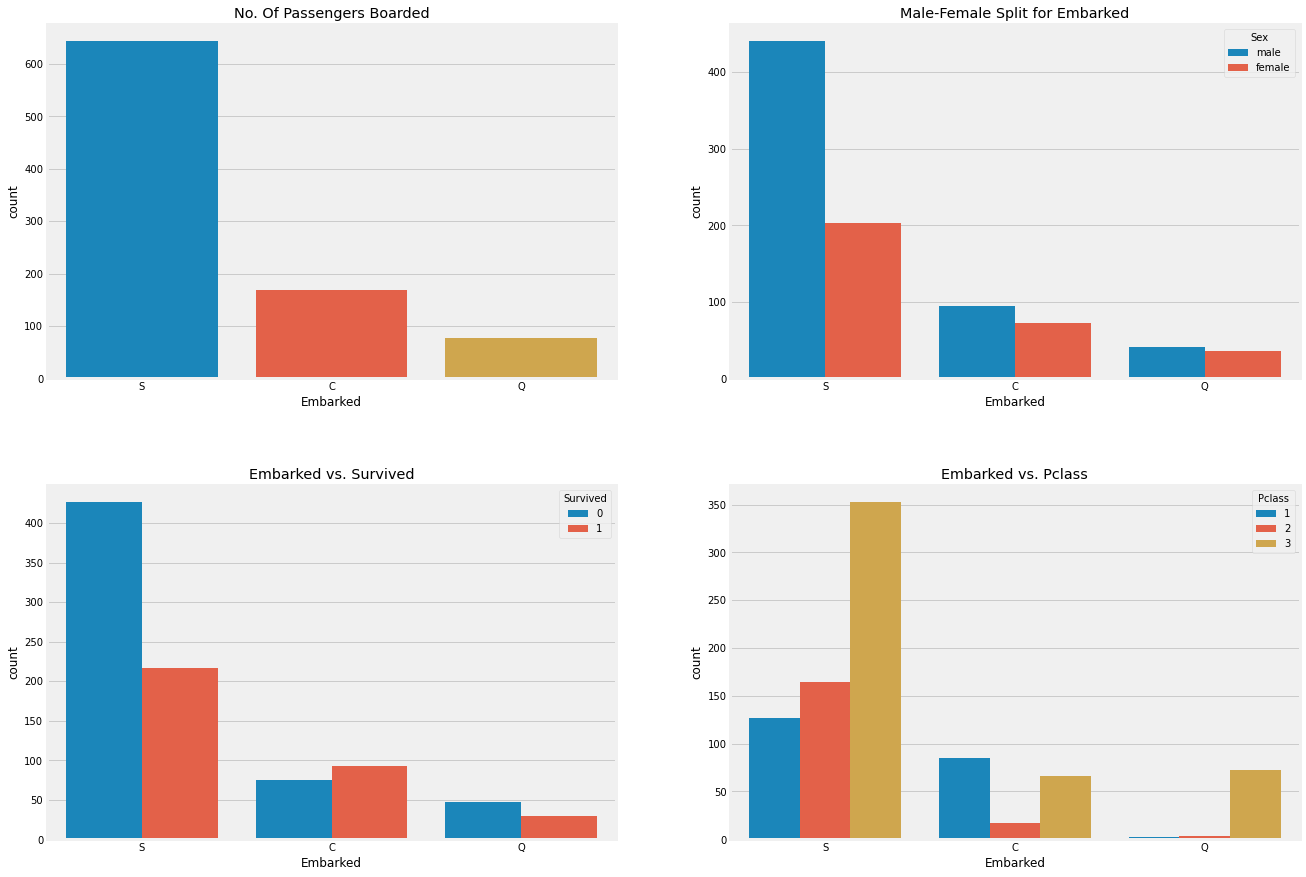

In [28]:
f,ax=plt.subplots(2,2,figsize=(20,15))

sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs. Survived')

sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs. Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

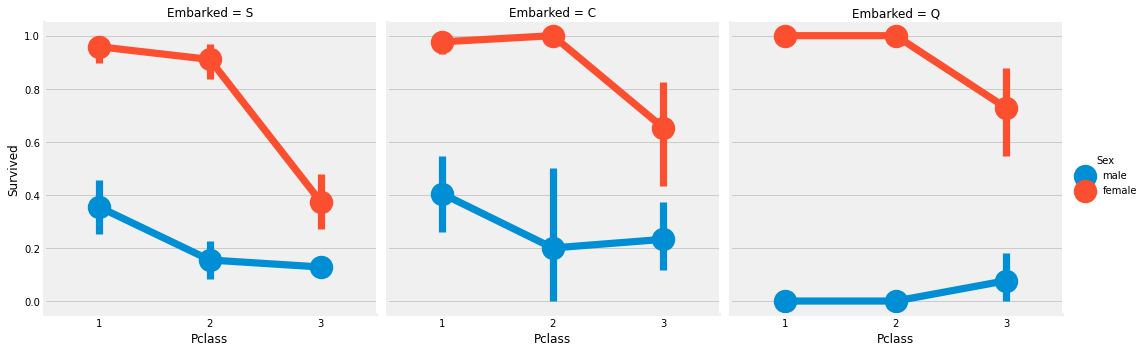

In [29]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

#### Embarked 결측치 처리

In [30]:
data['Embarked'].fillna('S',inplace=True)

In [31]:
data.Embarked.isnull().any()

False

### SibSp: Discrete Feature

- SibSp: whether a person is alone or with his family members (Spibling + Spouse)

In [35]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


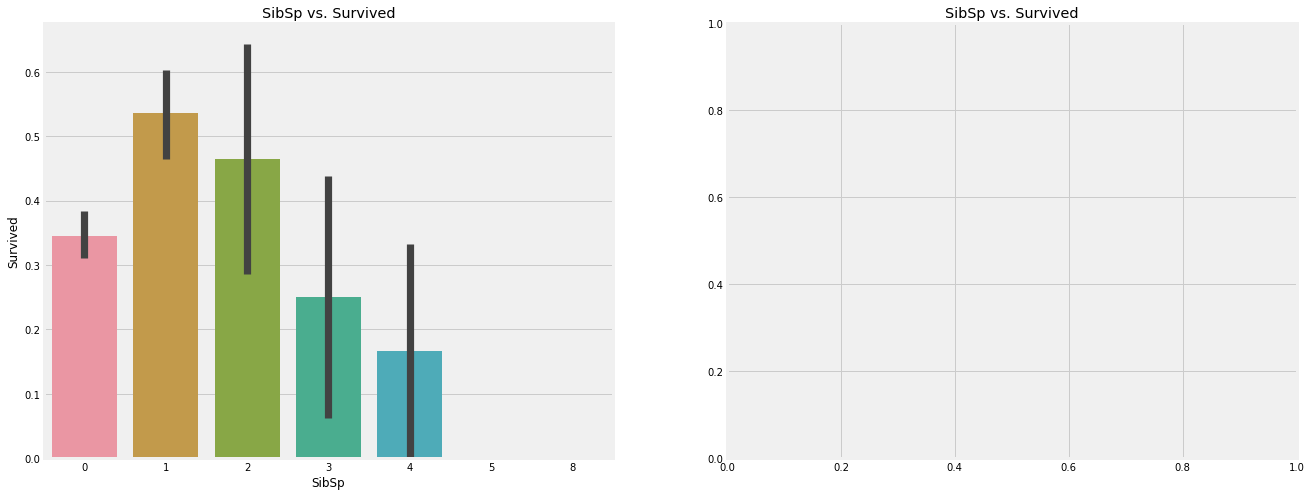

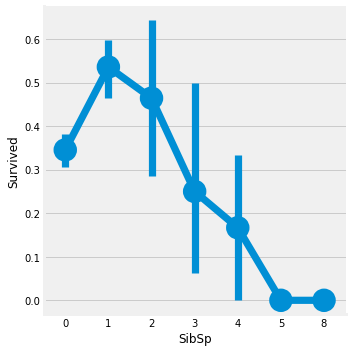

In [70]:
f, ax = plt.subplots(1,2, figsize=(20,8))

sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs. Survived')

sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs. Survived')

plt.close(2)
plt.show()

In [95]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


- 0명: 34.5% 생존
- sibsp 수 증가하면 생존율 감소 => 가족이랑 같이 타면 가족을 살리려 함
- sibsp 5명 이상이면 생존율 0 => 5명 이상인 경우는 Pclass가 3임

### Parch

부모 혹은 자녀의 수

In [39]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


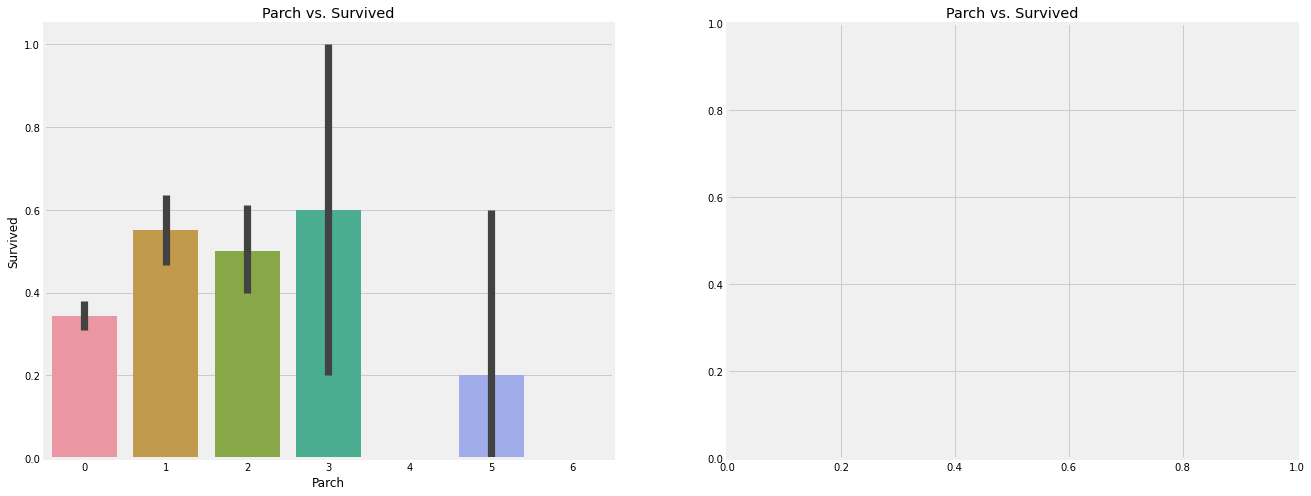

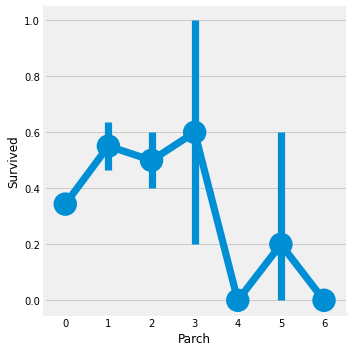

In [44]:
f, ax = plt.subplots(1,2, figsize=(20,8))

sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs. Survived')

sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs. Survived')

plt.show()

혼자보다는 부모님 혹은 자식들이랑 같이 탄 경우의 생존율 더 높음. 하지만 그 수가 크면 생존율 감소함.

### Fare: Continuous Feature

In [71]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())
print('Average Fare was:',data['Fare'].median())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746
Average Fare was: 14.4542


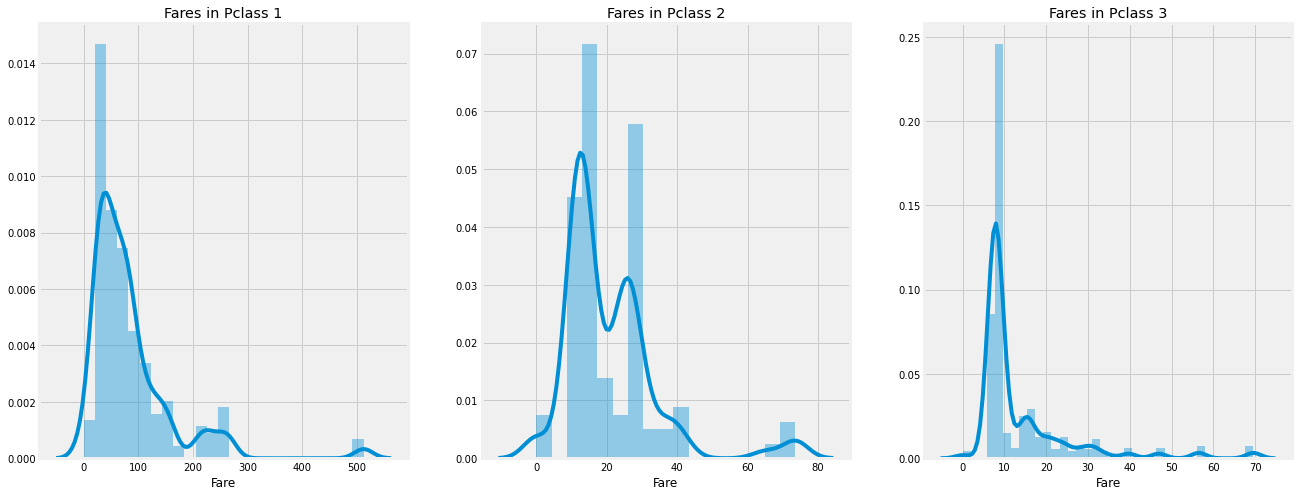

In [100]:
f,ax=plt.subplots(1,3,figsize=(20,8))

sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

Pclass1의 분포 넓게 퍼짐

### Correlation b/w Features

In [73]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Initial',
       'Family_Size', 'Alone'],
      dtype='object')

In [52]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.041709,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.091497,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339582,0.083081,0.018443,-0.549500
Age,0.041709,-0.091497,-0.339582,1.000000,-0.267734,-0.198712,0.089087
SibSp,-0.057527,-0.035322,0.083081,-0.267734,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.198712,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.089087,0.159651,0.216225,1.000000


- annot: 각 셀에 숫자 입력 여부
- linewidths: 경계선 굵기 설정
- fontsize

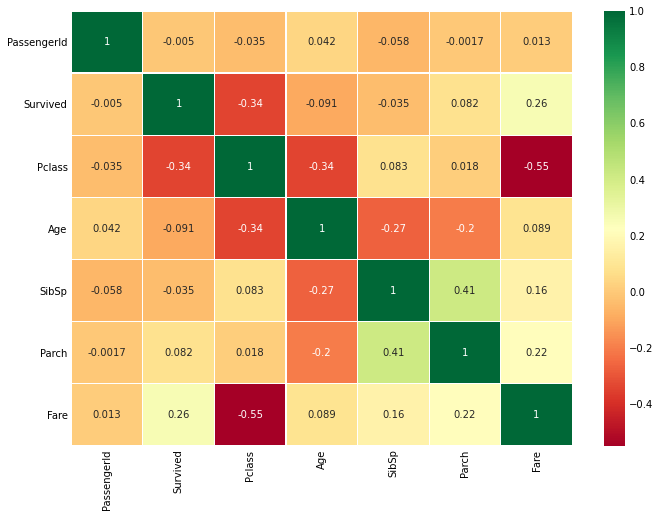

In [48]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# Part2: Feature Engineering and Data Cleaning

## Age: Continuous => Categorical

In [107]:
data['Age_band'] = 0

data.loc[data['Age']<=16, 'Age_band'] = 0
data.loc[(data['Age']>16)&(data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age']>32)&(data['Age']<=48), 'Age_band'] = 2
data.loc[(data['Age']>48)&(data['Age']<=64), 'Age_band'] = 3
data.loc[data['Age']>64, 'Age_band']=4

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [108]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


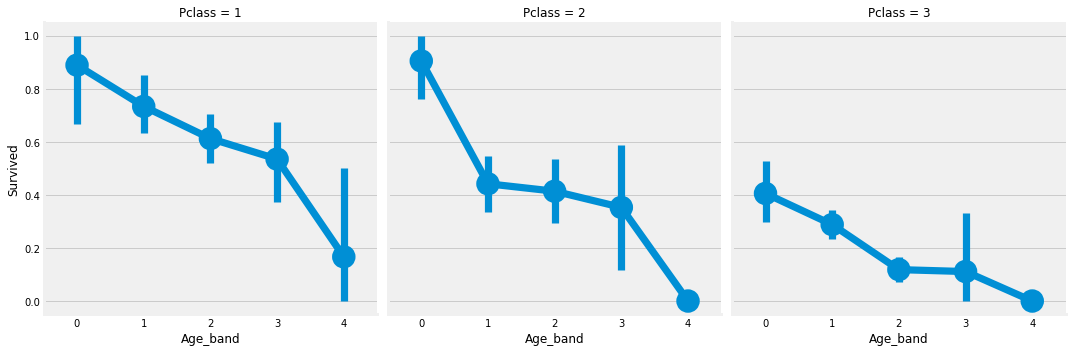

In [110]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

## Family_Size 변수 생성

In [66]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size==0, 'Alone'] = 1

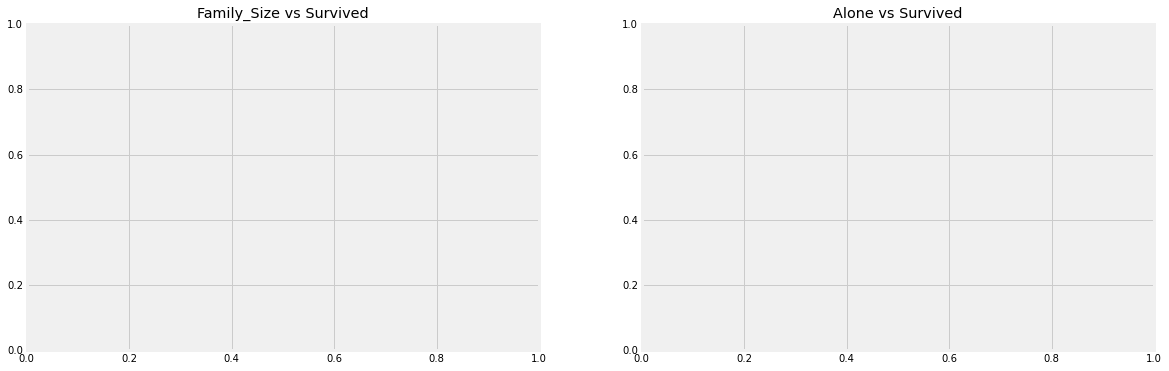

In [67]:
f, ax = plt.subplots(1,2, figsize=(18,6))

sns.factorplot('Family_Size', 'Survived', data=data, ax=[0])
ax[0].set_title('Family_Size vs Survived')

sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.close(2)
plt.close(3)
plt.show()

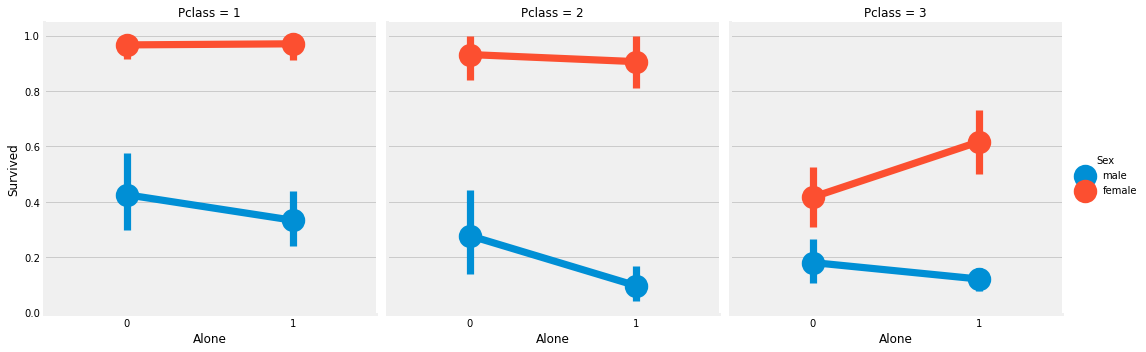

In [116]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

## Fare: Continous => Categorical

In [118]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [120]:
data['Fare_cat'] = 0
data.loc[data['Fare']<=7.91,'Fare_cat'] = 0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat'] = 1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat'] = 2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat'] = 3

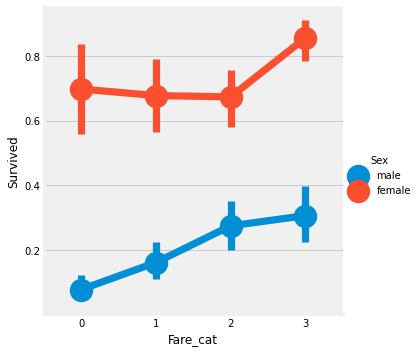

In [121]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

## String => Numeric

In [122]:
data['Sex'].replace(['male','female'], [0,1], inplace=True)
data['Embarked'].replace(['S','C','Q'], [0,1,2], inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'], [0,1,2,3,4], inplace=True)

## Drop Features

In [123]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)

## Correlation b/w Features

In [63]:
print(data.columns)
print(len(data.columns))

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Initial'],
      dtype='object')
13


In [60]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.041709,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.091497,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339582,0.083081,0.018443,-0.549500
Age,0.041709,-0.091497,-0.339582,1.000000,-0.267734,-0.198712,0.089087
SibSp,-0.057527,-0.035322,0.083081,-0.267734,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.198712,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.089087,0.159651,0.216225,1.000000


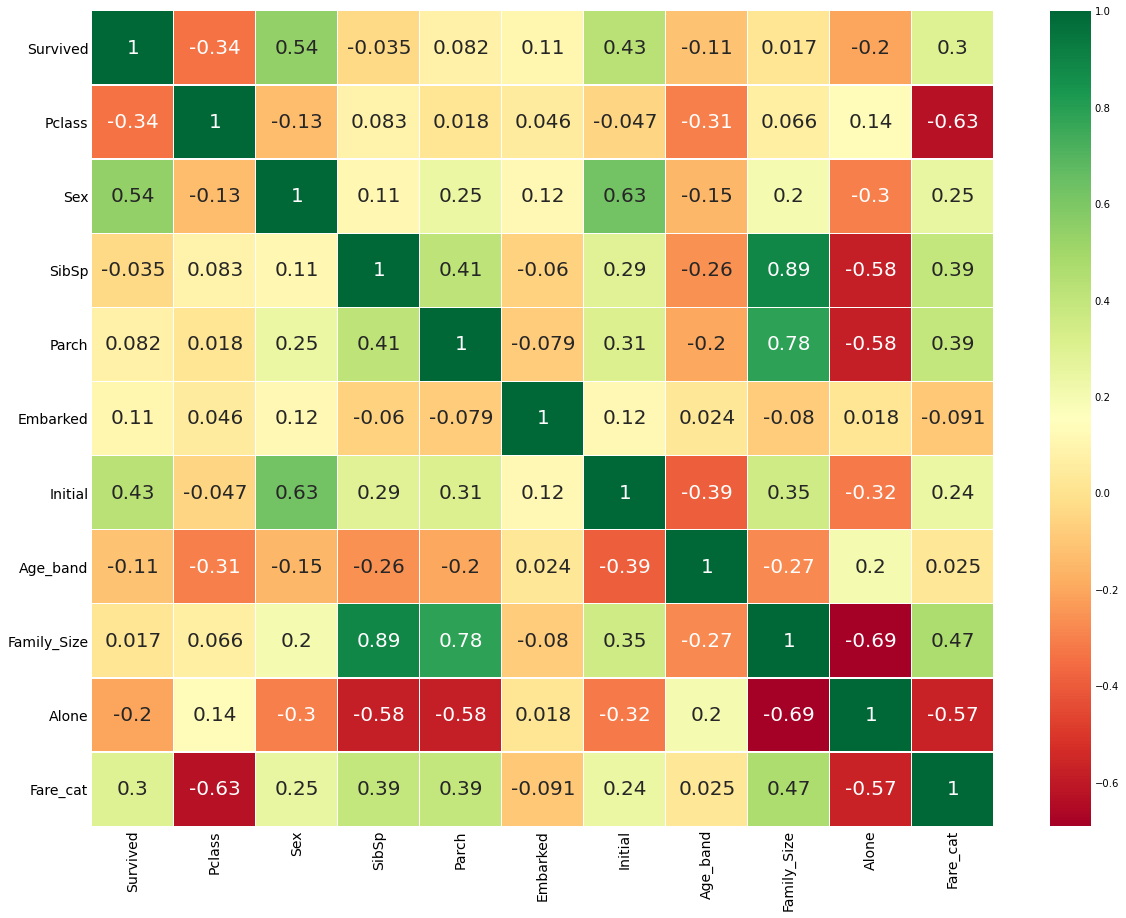

In [188]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Part3. Predictive Modeling

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [131]:
train, test = train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])

In [133]:
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]

test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]

X=data[data.columns[1:]]
Y=data['Survived']

## 모델링1

### 학습 & 정확도 확인

#### Radial SVM

In [151]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM:', round(metrics.accuracy_score(prediction1, test_Y),4))

Accuracy for rbf SVM: 0.8358


#### Linear SVM

In [152]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM:', round(metrics.accuracy_score(prediction2, test_Y),4))

Accuracy for linear SVM: 0.8172


#### Logistic Regression

In [173]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('Accuracy for Logistic Regression:', round(metrics.accuracy_score(prediction3, test_Y),4))

Accuracy for Logistic Regression: 0.8134


#### Decision Tree

In [155]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('Accuracy for Decision Tree:', round(metrics.accuracy_score(prediction4, test_Y),4))

Accuracy for Decision Tree: 0.7985


#### KNN

In [156]:
model = KNeighborsClassifier() # K=5
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('Accuracy for KNN:', round(metrics.accuracy_score(prediction5, test_Y),4))

Accuracy for KNN: 0.8321


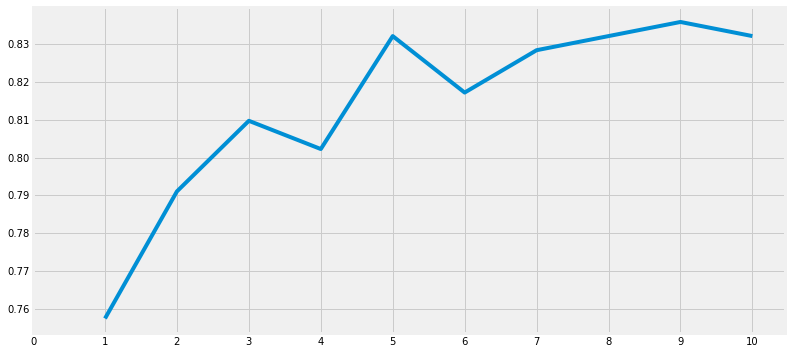

Accuracies for different values of n are: 
 [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [162]:
a_index = list(range(1,11))
a = pd.Series()
x = list(range(11))

for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))

plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

print('Accuracies for different values of n are: \n', a.values, 'with the max value as ', a.values.max())

#### Gaussian Naive Bayes

In [163]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('Accuracy for NaiveBayes:', round(metrics.accuracy_score(prediction6, test_Y),4))

Accuracy for NaiveBayes: 0.8134


#### Random Forests

In [164]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('Accuracy for Random Forests:', round(metrics.accuracy_score(prediction7, test_Y),4))

Accuracy for Random Forests: 0.8097


### 검증

#### Cross Validation

In [165]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict

In [167]:
kfold = KFold(n_splits=10, random_state=22)
xyz = []; accuracy = []; std = []; 
classifiers = ['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]

In [169]:
for i in models:
    model = i
    cv_result = cross_val_score(model, X,Y, cv=kfold, scoring='accuracy')
    # cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std}, index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813783,0.041210
Decision Tree,0.806991,0.026684
Naive Bayes,0.801386,0.028999
Random Forest,0.811498,0.032114


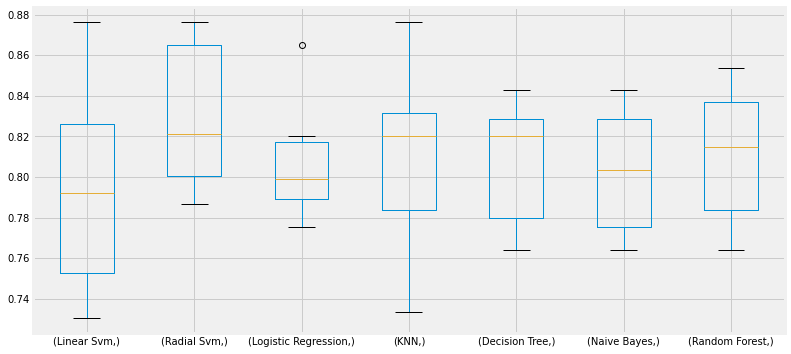

In [170]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

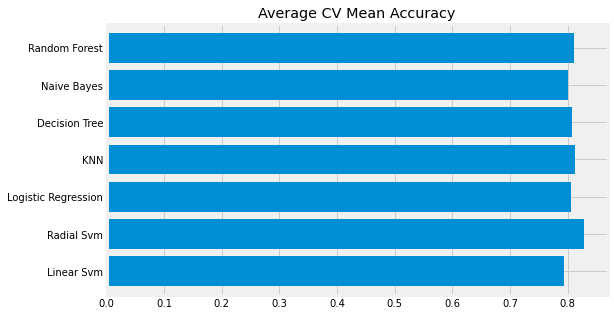

In [171]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

#### Confusion Matrix

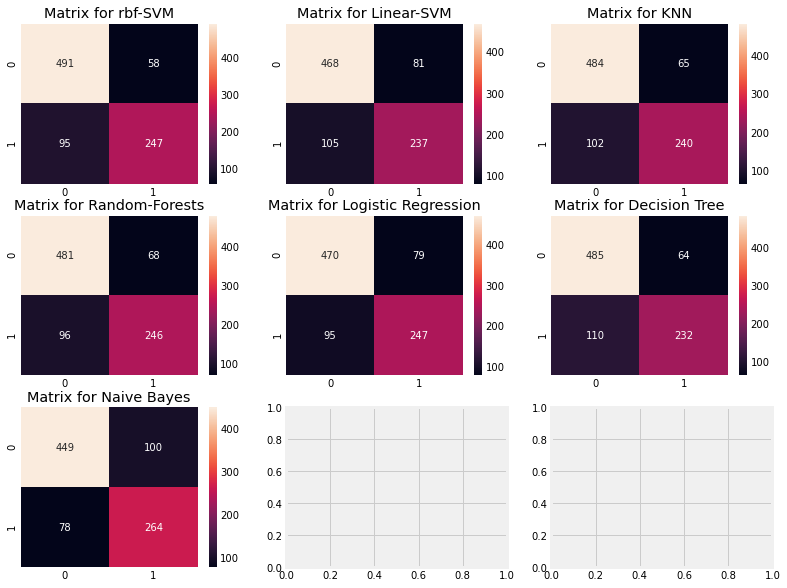

In [172]:
f,ax=plt.subplots(3,3,figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

### HyperParameter Tuning

#### SVM

In [175]:
from sklearn.model_selection import GridSearchCV

C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel':kernel, 'C':C, 'gamma':gamma}

gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X,Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282593685267716
SVC(C=0.4, gamma=0.3)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   28.8s finished


#### Random Forests

In [176]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}

gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   24.0s finished


0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


## 모델링2 - Ensemble

### Voting Classifier

In [177]:
from sklearn.ensemble import VotingClassifier

ensemble_lin_rbf = VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                                ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                                ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                                ('LR',LogisticRegression(C=0.05)),
                                                ('DT',DecisionTreeClassifier(random_state=0)),
                                                ('NB',GaussianNB()),
                                                ('svm',svm.SVC(kernel='linear',probability=True))], 
                                    voting='soft').fit(train_X,train_Y)

print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))

cross = cross_val_score(ensemble_lin_rbf, X,Y, cv=10, scoring="accuracy")

print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8246268656716418
The cross validated score is 0.8249188514357053


### Bagging

In [178]:
from sklearn.ensemble import BaggingClassifier

#### Bagged KNN

In [179]:
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))

result = cross_val_score(model, X,Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.835820895522388
The cross validated score for bagged KNN is: 0.8160424469413232


#### Bagged Decision Tree

In [180]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result = cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


### Boosting

#### AdaBoost (Adaptive Boosting)

In [181]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result = cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


#### Stochastic Gradient Boosting

In [183]:
from sklearn.ensemble import GradientBoostingClassifier

grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


#### XGBoost

In [184]:
import xgboost as xg

xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8115480649188515


#### Hyper-Parameter Tuning for AdaBoost

In [185]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  7.4min finished


####  Confusion Matrix for the Best Model (AdaBoost)

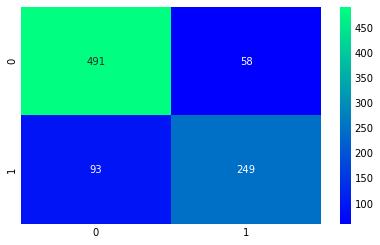

In [186]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

### Feature Importance

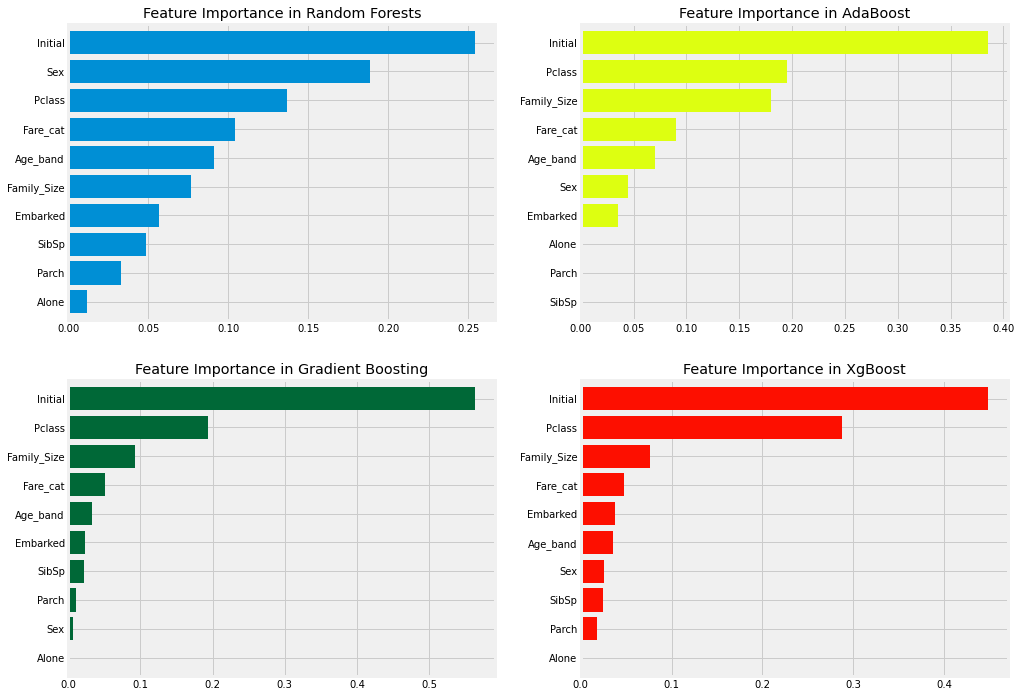

In [210]:
f,ax=plt.subplots(2,2,figsize=(15,12))

model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')

plt.show()